## Description
A Nigerian automobile company, Great Motors, has just employed you as their lead data scientist for the analytics division.

Great Motors deals in used cars, with a huge market base in Nigeria. The company has a unique platform where customers can buy and sell cars. A seller posts details about the vehicle for review by the company’s mechanic on the platform to ascertain the vehicle's value. The company then lists the car for sale at the best price. Great Motors makes its profit by receiving a percentage of the selling price listed on the company platform. To ensure the car's selling price is the best for both the customer selling the vehicle and Great Motors, you have been assigned the task of coming up with a predictive model for determining the price of the car.

Your job is to predict the price the company should sell a car based on the available data the mechanics have submitted to you.

The objective of the challenge is to predict the price (Amount (Million Naira) the company should sell a car based on the available data (Location, Maker, Model, Year, Colour, Amount (Million Naira), Type, Distance). The objective is the predict the selling price.

There are ~7000 entries in Train and ~2000 entries in Test.

The objective of the challenge is to predict the price (Amount (Million Naira) the company should sell a car based on the available data (Location, Maker, Model, Year, Colour, Amount (Million Naira), Type, Distance). The objective is the predict the selling price.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Data Exploration

In [2]:
# loading the train and test sets
train = pd.read_csv('train.csv')
test =pd.read_csv('test.csv')

train.head()

,VehicleID,Location,Maker,Model,Year,Colour,Amount (Million Naira),Type,Distance
0,VHL12546,Abuja,Honda,Accord Coupe EX V-6,"2,011",Silver,2.2,Nigerian Used,NaN
1,VHL18827,Ibadan,Hyundai,Sonata,"2,012",Silver,3.5,Nigerian Used,"125,000"
2,VHL19499,Lagos,Lexus,RX 350,"2,010",Red,9.2,Foreign Used,"110,852"
3,VHL17991,Abuja,Mercedes-Benz,GLE-Class,"2,017",Blue,22.8,Foreign Used,"30,000"
4,VHL12170,Ibadan,Toyota,Highlander,"2,002",Red,2.6,Nigerian Used,"125,206"


In [3]:
train.shape

(7205, 9)

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7205 entries, 0 to 7204
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   VehicleID               7205 non-null   object 
 1   Location                7205 non-null   object 
 2   Maker                   7205 non-null   object 
 3   Model                   7205 non-null   object 
 4   Year                    7184 non-null   object 
 5   Colour                  7205 non-null   object 
 6   Amount (Million Naira)  7188 non-null   float64
 7   Type                    7008 non-null   object 
 8   Distance                4845 non-null   object 
dtypes: float64(1), object(8)
memory usage: 506.7+ KB


In [6]:
train.isnull().sum()

VehicleID                    0
Location                     0
Maker                        0
Model                        0
Year                        21
Colour                       0
Amount (Million Naira)      17
Type                       197
Distance                  2360
dtype: int64

In [7]:
train.Type.value_counts()

Foreign Used     4896
Nigerian Used    1895
Brand New         217
Name: Type, dtype: int64

In [8]:
train['Year'].unique()

array(['2,011', '2,012', '2,010', '2,017', '2,002', '2,019', '2,015',
       '2,004', '2,003', '2,008', '2,018', '2,020', '2,006', '2,016',
       '2,014', '2,007', '2,009', '2,005', '2,021', '2,013', '2,000', nan,
       '1,992', '2,001', '1,997', '1,999', '1,993', '1,998', '1,986',
       '1,996', '2,022', '1,995', '1,979', '1,989'], dtype=object)

I noticed that the year data was not entered correctly, so I am going to remove all the `,` using a `.replace()` string method and a for loop.

In [16]:
train['Year'] = [str(x).replace(',','') for x in train['Year']]

# train['Year'].value_counts()

In [14]:
test['Year'] = [str(x).replace(',','') for x in test['Year']]

# test['Year'].value_counts()

In [15]:
test.head()

,VehicleID,Location,Maker,Model,Year,Colour,Type,Distance
0,VHL18518,Abuja,BMW,323i,2008,White,Foreign Used,30524.0
1,VHL17149,Lagos,Toyota,Camry,2013,White,Foreign Used,NaN
2,VHL10927,Lagos,Toyota,Highlander Limited V6,2005,Gold,Foreign Used,NaN
3,VHL12909,Lagos,Toyota,Camry,2011,Gray,Foreign Used,166839.0
4,VHL12348,Lagos,Lexus,ES 350 FWD,2013,Red,Foreign Used,88862.0


In [11]:
test.shape

(2061, 8)

In [16]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2061 entries, 0 to 2060
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   VehicleID  2061 non-null   object 
 1   Location   2061 non-null   object 
 2   Maker      2061 non-null   object 
 3   Model      2061 non-null   object 
 4   Year       2061 non-null   object 
 5   Colour     2061 non-null   object 
 6   Type       2007 non-null   object 
 7   Distance   1385 non-null   float64
dtypes: float64(1), object(7)
memory usage: 128.9+ KB


## Data cleaning
* check for null values and fix them
* check for duplicate rows
* change the data type of the `Distance` column in the train set
* create dummy variables for the object columns in the train and test set
* drop irrelevant features

In [17]:
# checking for null values
train.isnull().sum()

VehicleID                    0
Location                     0
Maker                        0
Model                        0
Year                         0
Colour                       0
Amount (Million Naira)      17
Type                       197
Distance                  2360
dtype: int64

I am going to fix the `Amount (Million Naira)` column first, but be for that, I want to observe the rows with missing values. Note that whatever you do to the train set, do the same to the test set.

Since `Amount (Million Naira)` is our target variable, any cell that is missing is definitly not important to use, so I am going to drop every row that has a missing value for the `Amount (Million Naira)` column.

In [14]:
train= train.dropna(axis=0, subset=['Amount (Million Naira)'])

In [15]:
train.isnull().sum()

VehicleID                    0
Location                     0
Maker                        0
Model                        0
Year                         0
Colour                       0
Amount (Million Naira)       0
Type                       196
Distance                  2352
dtype: int64

In [18]:
train.loc[train['Year'] == 2021]

,VehicleID,Location,Maker,Model,Year,Colour,Amount (Million Naira),Type,Distance


In [16]:
train['Year'] = [x.replace('nan','2011') for x in train['Year'] ]

In [15]:
train['Year'].value_counts()

2,008    755
2,010    618
2,013    599
2,007    484
2,012    460
2,011    455
2,009    439
2,014    412
2,015    369
2,006    349
2,005    298
2,017    291
2,016    280
2,018    269
2,004    222
2,020    204
2,019    189
2,021    145
2,003    122
2,002     74
2,001     55
2,000     39
1,999     19
1,998     11
2,022     10
1,997      5
1,992      3
1,986      2
1,995      2
1,993      1
1,996      1
1,979      1
1,989      1
Name: Year, dtype: int64

In [18]:
test.shape[0]

2061

In [19]:
test.loc[test['Year'] == 'nan']

,VehicleID,Location,Maker,Model,Year,Colour,Type,Distance
27,VHL16050,Abuja,Hyundai,Sonata,nan,Gray,Nigerian Used,NaN
1517,VHL10361,Abuja,Land Rover,Range Rover Evoque,nan,White,Foreign Used,57421.0


I am just going to do the same thing I did to the train set to these two nan rows in the Year column in the test set because there is no  way to assertain the year of these cars based on the data here.

In [20]:
test['Year'] = [x.replace('nan','2011') for x in test['Year'] ]

In [21]:
# drop the rows with nan values in the year column for the test set
# test.drop([27,1517], axis=0, inplace=True)

In [22]:
test.Year.unique()

array(['2008', '2013', '2005', '2011', '2017', '1999', '2019', '2006',
       '2015', '2007', '2012', '2016', '2010', '2003', '2004', '2021',
       '2018', '2014', '2009', '2001', '2022', '2002', '2020', '1997',
       '2000', '1998', '1986', '1991', '1982'], dtype=object)

In [23]:
# it is remaining the Type and Distance column
train.isnull().sum()

VehicleID                    0
Location                     0
Maker                        0
Model                        0
Year                         0
Colour                       0
Amount (Million Naira)       0
Type                       196
Distance                  2352
dtype: int64

In [24]:
# it is remaining the Type and Distance column
test.isnull().sum()

VehicleID      0
Location       0
Maker          0
Model          0
Year           0
Colour         0
Type          54
Distance     676
dtype: int64

Next, I will try to fix the `Type column`. Let me inspect this column.

In [25]:
train.Type.value_counts()

Foreign Used     4886
Nigerian Used    1889
Brand New         217
Name: Type, dtype: int64

## Let's do some data viz
<b id="viz">I will make a copy of the train dataset an explore it visually</b>

<a href="#end">Go to end</a>

In [32]:
dtrain = train.copy()


In [78]:
df_main = dtrain.loc[dtrain['Type'].isnull()]

In [79]:
df_main['Distance'] = [str(x).replace(',','') for x in df_main['Distance']]
df_main['Distance'] = [str(x).replace('nan','0') for x in df_main['Distance']]
df_main['Distance'] = df_main['Distance'].astype(float)

C:\Users\YASHIM~1\AppData\Local\Temp/ipykernel_23076/3014204428.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_main['Distance'] = [str(x).replace(',','') for x in df_main['Distance']]
C:\Users\YASHIM~1\AppData\Local\Temp/ipykernel_23076/3014204428.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_main['Distance'] = [str(x).replace('nan','0') for x in df_main['Distance']]
C:\Users\YASHIM~1\AppData\Local\Temp/ipykernel_23076/3014204428.py:3: SettingWithCopyWarning: 
A value is trying to be set on

In [76]:
df_main.Distance.value_counts()

139,938    1
156,155    1
213,374    1
112,978    1
16,986     1
48,428     1
80,888     1
66         1
201        1
63,339     1
192,232    1
319,568    1
113,231    1
6,575      1
163,287    1
75,538     1
86,280     1
164,003    1
303,353    1
163,350    1
Name: Distance, dtype: int64

In [77]:
df_main.shape

(20, 9)

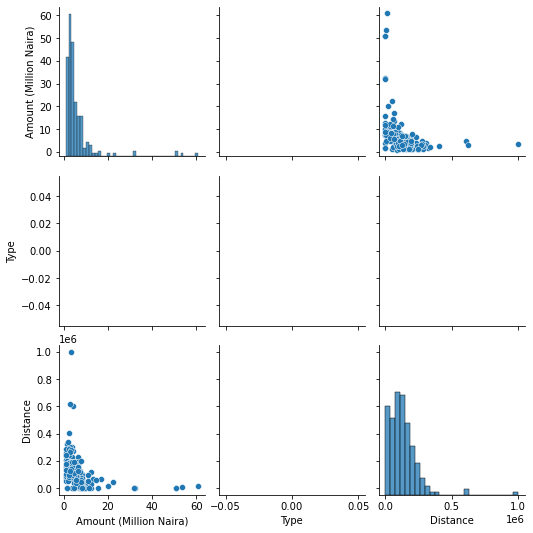

In [80]:
sns.pairplot(df_main.iloc[:,:])

In [45]:
df_nu = dtrain.loc[dtrain['Type'] == 'Nigerian Used']

In [48]:
# df_nu['Distance'] = [str(x).replace(',','') for x in df_nu['Distance']]
df_nu['Distance'] = [str(x).replace('nan','0') for x in df_nu['Distance']]
df_nu['Distance'] = df_nu['Distance'].astype(float)

C:\Users\YASHIM~1\AppData\Local\Temp/ipykernel_23076/3731568875.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nu['Distance'] = [str(x).replace('nan','0') for x in df_nu['Distance']]
C:\Users\YASHIM~1\AppData\Local\Temp/ipykernel_23076/3731568875.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nu['Distance'] = df_nu['Distance'].astype(float)


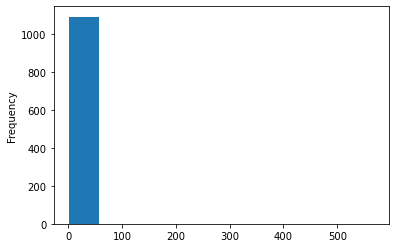

In [50]:
df_nu['Distance'].value_counts().plot(kind='hist');

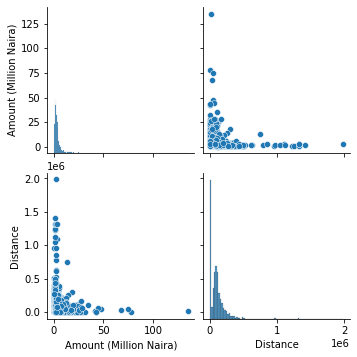

In [61]:
sns.pairplot(df_nu.iloc[:,:]);

In [62]:
df_fu = dtrain.loc[dtrain['Type'] == 'Foreign Used']

In [63]:
df_fu['Distance'] = [str(x).replace(',','') for x in df_fu['Distance']]
df_fu['Distance'] = [str(x).replace('nan','0') for x in df_fu['Distance']]
df_fu['Distance'] = df_fu['Distance'].astype(float)

C:\Users\YASHIM~1\AppData\Local\Temp/ipykernel_23076/2611306689.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fu['Distance'] = [str(x).replace(',','') for x in df_fu['Distance']]
C:\Users\YASHIM~1\AppData\Local\Temp/ipykernel_23076/2611306689.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fu['Distance'] = [str(x).replace('nan','0') for x in df_fu['Distance']]
C:\Users\YASHIM~1\AppData\Local\Temp/ipykernel_23076/2611306689.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy 

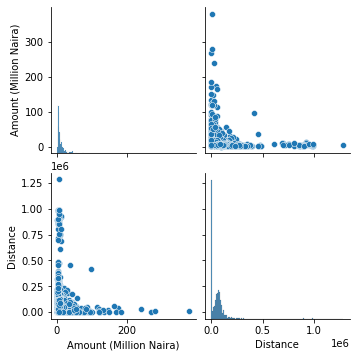

In [64]:
sns.pairplot(df_fu.iloc[:,:]);

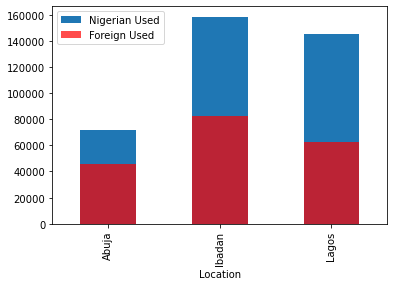

In [108]:
df_nu.groupby('Location')['Distance'].mean().plot(kind='bar', label = 'Nigerian Used')
df_fu.groupby('Location')['Distance'].mean().plot(kind='bar', alpha = 0.7, color='red', label= 'Foreign Used')
plt.legend();

### Nigerian Used

In [111]:
df_nu_abj = df_nu.loc[df_nu['Location'] == 'Abuja']
df_nu_ib = df_nu.loc[df_nu['Location'] == 'Ibadan']
df_nu_lag = df_nu.loc[df_nu['Location'] == 'Lagos']

In [118]:
A = df_nu_abj.Distance.max()
a = df_nu_abj.Distance.mean()

In [119]:
I = df_nu_ib.Distance.max()
i = df_nu_ib.Distance.mean()

In [120]:
L = df_nu_lag.Distance.max()
l = df_nu_lag.Distance.mean()

In [122]:
xx=['A','a','I','i','L','l']
yy=[A,a,I,i,L,l]

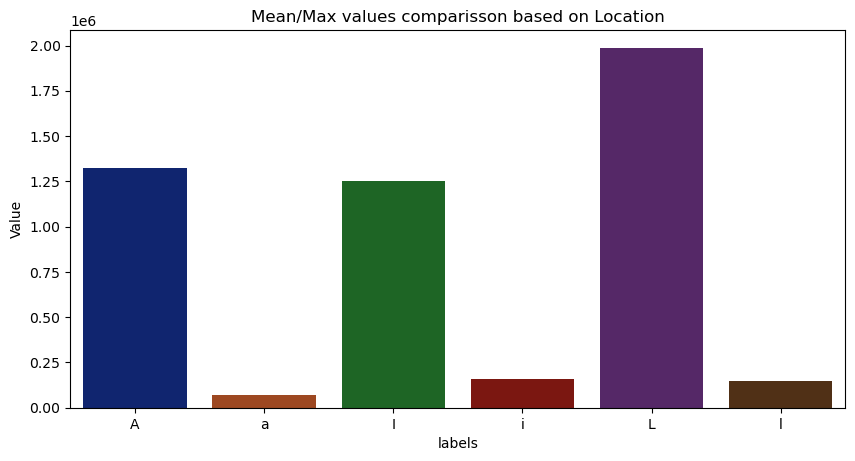

In [126]:
plt.figure(figsize=[10,5],dpi = 100)
plt.title('Mean/Max values comparisson based on Location')
plt.ylabel('Value')
plt.xlabel('labels')
sns.barplot(y = yy,x = xx,palette='dark');

### Foreign Used

In [127]:
df_fu_abj = df_fu.loc[df_fu['Location'] == 'Abuja']
df_fu_ib = df_fu.loc[df_fu['Location'] == 'Ibadan']
df_fu_lag = df_fu.loc[df_fu['Location'] == 'Lagos']

In [133]:
AA = df_fu_abj.Distance.max()
aa = df_fu_abj.Distance.mean()
aa

45710.06751727805

In [129]:
II = df_fu_ib.Distance.max()
ii = df_fu_ib.Distance.mean()

In [130]:
LL = df_fu_lag.Distance.max()
ll = df_fu_lag.Distance.mean()

In [131]:
xxx=['AA','aa','II','ii','LL','ll']
yyy=[AA,aa,II,ii,LL,ll]

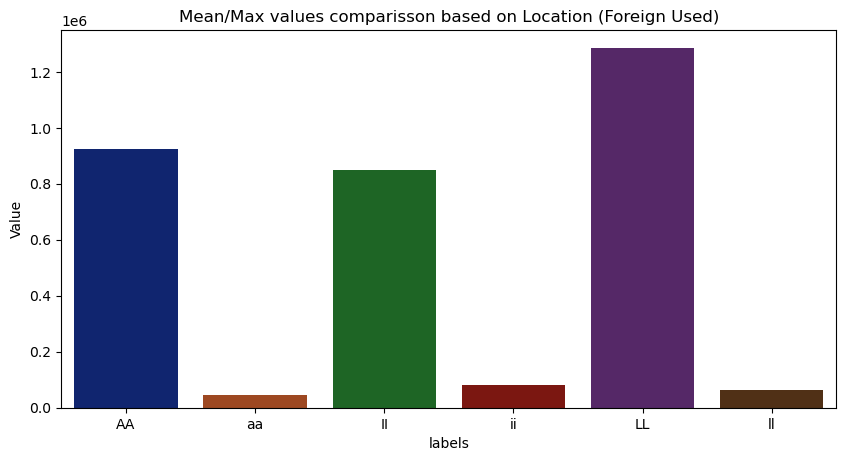

In [135]:
plt.figure(figsize=[10,5],dpi = 100)
plt.title('Mean/Max values comparisson based on Location (Foreign Used)')
plt.ylabel('Value')
plt.xlabel('labels')
sns.barplot(y = yyy,x = xxx,palette='dark');

<AxesSubplot:xlabel='Location'>

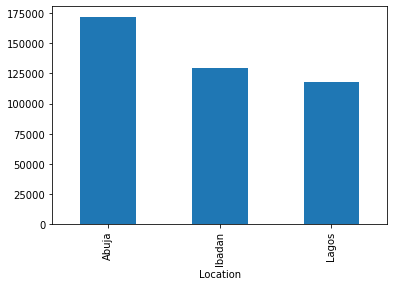

In [109]:
df_main.groupby('Location')['Distance'].mean().plot(kind='bar');

### Nigerian Used

In [136]:
df_m_abj = df_main.loc[df_main['Location'] == 'Abuja']
df_m_ib = df_main.loc[df_main['Location'] == 'Ibadan']
df_m_lag = df_main.loc[df_main['Location'] == 'Lagos']

In [137]:
A = df_m_abj.Distance.max()
a = df_m_abj.Distance.mean()

In [138]:
I = df_m_ib.Distance.max()
i = df_m_ib.Distance.mean()

In [139]:
L = df_m_lag.Distance.max()
l = df_m_lag.Distance.mean()

In [140]:
xx=['A','a','I','i','L','l']
yy=[A,a,I,i,L,l]

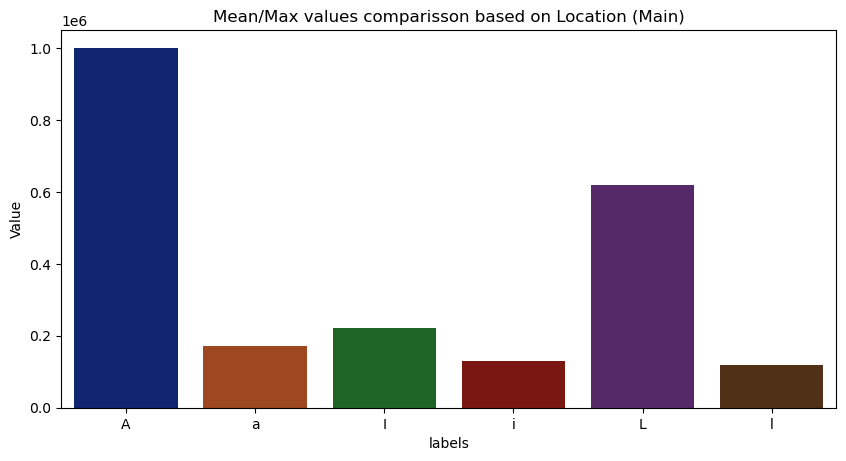

In [141]:
plt.figure(figsize=[10,5],dpi = 100)
plt.title('Mean/Max values comparisson based on Location (Main)')
plt.ylabel('Value')
plt.xlabel('labels')
sns.barplot(y = yy,x = xx,palette='dark');

In [143]:
df_main2 = dtrain.loc[train['Type'].notnull()]

In [153]:
df_main2['Distance'] = [str(x).replace(',','') for x in df_main2['Distance']]
df_main2['Distance'] = [str(x).replace('nan','0') for x in df_main2['Distance']]
df_main2['Distance'] = df_main2['Distance'].astype(float)

C:\Users\YASHIM~1\AppData\Local\Temp/ipykernel_23076/1276599090.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_main2['Distance'] = [str(x).replace(',','') for x in df_main2['Distance']]
C:\Users\YASHIM~1\AppData\Local\Temp/ipykernel_23076/1276599090.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_main2['Distance'] = [str(x).replace('nan','0') for x in df_main2['Distance']]
C:\Users\YASHIM~1\AppData\Local\Temp/ipykernel_23076/1276599090.py:3: SettingWithCopyWarning: 
A value is trying to be se

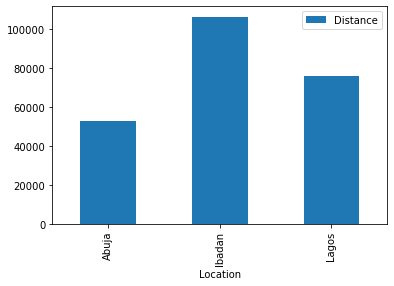

In [156]:
df_main2.groupby('Location')['Distance'].mean().plot(kind='bar')
plt.legend();

### Nigerian Used

In [157]:
df_nu_abj = df_main2.loc[df_main2['Location'] == 'Abuja']
df_nu_ib = df_main2.loc[df_main2['Location'] == 'Ibadan']
df_nu_lag = df_main2.loc[df_main2['Location'] == 'Lagos']

In [158]:
A = df_nu_abj.Distance.max()
a = df_nu_abj.Distance.mean()

In [159]:
I = df_nu_ib.Distance.max()
i = df_nu_ib.Distance.mean()

In [160]:
L = df_nu_lag.Distance.max()
l = df_nu_lag.Distance.mean()

In [161]:
xx=['A','a','I','i','L','l']
yy=[A,a,I,i,L,l]

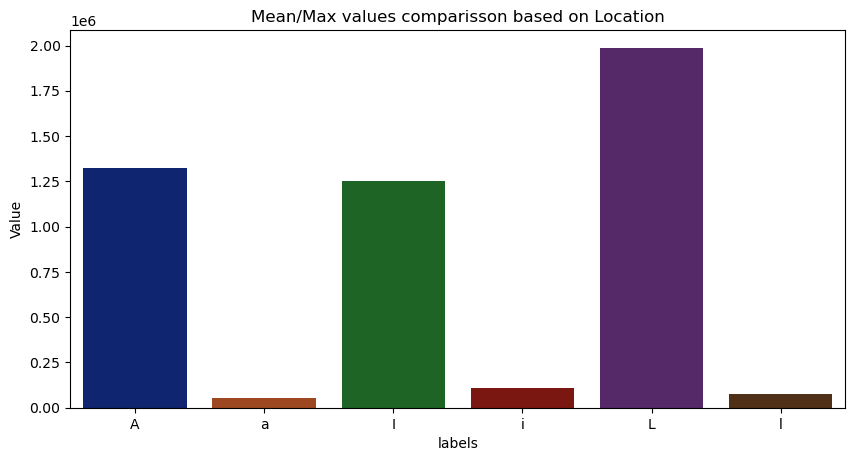

In [162]:
plt.figure(figsize=[10,5],dpi = 100)
plt.title('Mean/Max values comparisson based on Location')
plt.ylabel('Value')
plt.xlabel('labels')
sns.barplot(y = yy,x = xx,palette='dark');

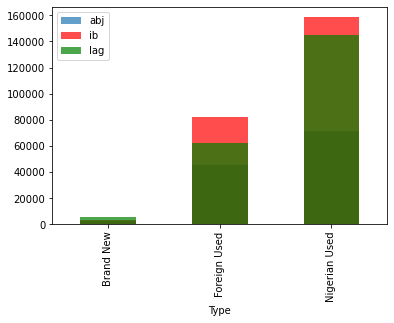

In [198]:
df_nu_abj.groupby('Type')['Distance'].mean().plot(kind='bar',label='abj',alpha=0.7)
df_nu_ib.groupby('Type')['Distance'].mean().plot(kind='bar',label='ib',color='red',alpha=0.7)
df_nu_lag.groupby('Type')['Distance'].mean().plot(kind='bar',label='lag',color='green',alpha=0.7)
plt.legend();

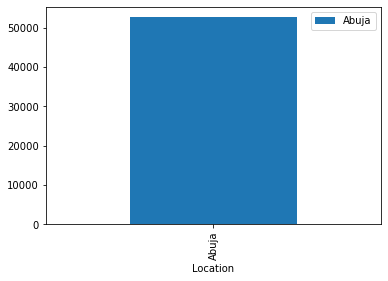

In [173]:
df_nu_abj.groupby('Location')['Distance'].mean().plot(kind='bar',label ='Abuja')
# df_nu_ib.groupby('Location')['Distance'].mean().hist(label= 'Ibadan')
# df_nu_lag.groupby('Location')['Distance'].mean().hist(label='Lagos')
plt.legend();

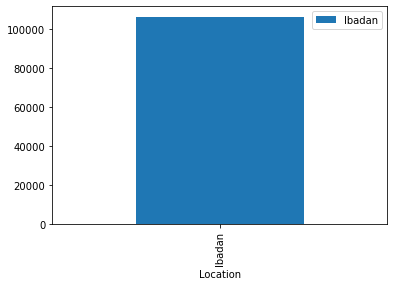

In [174]:
df_nu_ib.groupby('Location')['Distance'].mean().plot(kind='bar',label= 'Ibadan')
# df_nu_lag.groupby('Location')['Distance'].mean().hist(label='Lagos')
plt.legend();

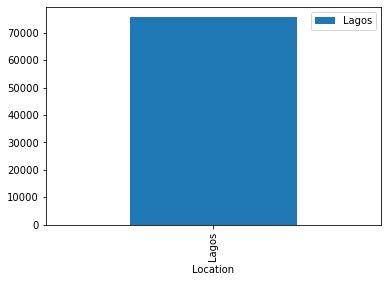

In [175]:
df_nu_lag.groupby('Location')['Distance'].mean().plot(kind='bar',label='Lagos')
plt.legend();

In [ ]:
sns.countplot

In [178]:
df_nu_lag.shape

(3163, 9)

### <a href="#viz">The end of data viz</a>
***
<b id="end">***</b>

### Filling the Type column based on the viz done above

In [26]:
train['Distance'] = [str(x).replace(',','') for x in train['Distance']]
train['Distance'] = [str(x).replace('nan','0') for x in train['Distance']]
train['Distance'] = train['Distance'].astype(float)

In [27]:
test.shape

(2061, 8)

In [28]:
train.isnull().sum()

VehicleID                   0
Location                    0
Maker                       0
Model                       0
Year                        0
Colour                      0
Amount (Million Naira)      0
Type                      196
Distance                    0
dtype: int64

In [29]:
df_null = train.loc[train['Type'].isnull()]

In [30]:
train.describe(include='all')

,VehicleID,Location,Maker,Model,Year,Colour,Amount (Million Naira),Type,Distance
count,7188,7188,7188,7188,7188,7188,7188.000000,6992,7.188000e+03
unique,5129,3,55,1221,33,21,NaN,3,NaN
top,VHL12352,Lagos,Toyota,Camry,2008,Black,NaN,Foreign Used,NaN
freq,5,3310,2738,649,755,2118,NaN,4886,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,11.847999,NaN,6.945797e+04
std,NaN,NaN,NaN,NaN,NaN,NaN,25.318922,NaN,1.085050e+05
min,NaN,NaN,NaN,NaN,NaN,NaN,0.450000,NaN,0.000000e+00
25%,NaN,NaN,NaN,NaN,NaN,NaN,3.500000,NaN,0.000000e+00
50%,NaN,NaN,NaN,NaN,NaN,NaN,5.650000,NaN,5.300000e+04
75%,NaN,NaN,NaN,NaN,NaN,NaN,11.662500,NaN,9.560950e+04


In [31]:
df_null.Distance.mean()

129432.46428571429

In [32]:
df_bn = df_null.query("Distance <= 129432.46428571429 ")

In [33]:
df_nu = df_null.query("Distance >= 129432.46428571429 ")

In [34]:
df_bn['Type'] = [str(x).replace('nan','Brand New') for x in df_bn['Type'] ]
df_nu['Type'] = [str(x).replace('nan','Nigerian Used') for x in df_nu['Type'] ]

C:\Users\YASHIM~1\AppData\Local\Temp/ipykernel_23432/2784325404.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bn['Type'] = [str(x).replace('nan','Brand New') for x in df_bn['Type'] ]
C:\Users\YASHIM~1\AppData\Local\Temp/ipykernel_23432/2784325404.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nu['Type'] = [str(x).replace('nan','Nigerian Used') for x in df_nu['Type'] ]


In [35]:
df_null = pd.concat([df_nu,df_bn])

In [36]:
df_notnull = train.loc[train['Type'].notnull()]

In [37]:
train = pd.concat([df_null,df_notnull])

In [38]:
train = train.sample(frac = 1,random_state=1234)

In [39]:
train.shape

(7188, 9)

In [40]:
train.head()

,VehicleID,Location,Maker,Model,Year,Colour,Amount (Million Naira),Type,Distance
4486,VHL15241,Lagos,Lexus,RX 350,2011,White,9.55,Foreign Used,0.0
854,VHL15892,Abuja,Hyundai,Atos,2012,Gray,6.30,Foreign Used,82000.0
666,VHL15699,Abuja,BMW,X5,2016,Black,22.00,Foreign Used,0.0
6645,VHL14050,Lagos,Lexus,ES 350,2008,White,4.40,Foreign Used,78650.0
5826,VHL14658,Abuja,Toyota,RAV4 XLE AWD (2.5L 4cyl 6A),2017,Silver,12.00,Foreign Used,75000.0


In [41]:
train.loc[train['Type'].isnull()]

,VehicleID,Location,Maker,Model,Year,Colour,Amount (Million Naira),Type,Distance


No more nan values for the type column because I filled them all with `Nigerian Used`. Now let us try to do the same for the test set.

In [42]:
test['Distance'] = [str(x).replace(',','') for x in test['Distance']]
test['Distance'] = [str(x).replace('nan','0') for x in test['Distance']]
test['Distance'] = test['Distance'].astype(float)

In [43]:
df_null = test.loc[test['Type'].isnull()]

In [44]:
df_null.Distance.mean()

148200.83333333334

In [45]:
df_bn = df_null.query("Distance <= 148200.83333333334")
df_nu = df_null.query("Distance >= 148200.83333333334")

In [46]:
df_bn['Type'] = [str(x).replace('nan','Brand New') for x in df_bn['Type'] ]
df_nu['Type'] = [str(x).replace('nan','Nigerian Used') for x in df_nu['Type'] ]

C:\Users\YASHIM~1\AppData\Local\Temp/ipykernel_23432/2784325404.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bn['Type'] = [str(x).replace('nan','Brand New') for x in df_bn['Type'] ]
C:\Users\YASHIM~1\AppData\Local\Temp/ipykernel_23432/2784325404.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nu['Type'] = [str(x).replace('nan','Nigerian Used') for x in df_nu['Type'] ]


In [47]:
df_null = pd.concat([df_bn,df_nu])

In [48]:
df_notnull = test.loc[test['Type'].notnull()]

In [49]:
test = pd.concat([df_null,df_notnull])

In [50]:
test = test.sample(frac=1, random_state=123)

In [51]:
test.shape

(2061, 8)

In [52]:
test.head()

,VehicleID,Location,Maker,Model,Year,Colour,Type,Distance
224,VHL11093,Lagos,Toyota,Venza AWD,2011,Black,Foreign Used,0.0
1109,VHL19799,Abuja,Toyota,Camry,2021,Gray,Foreign Used,3008.0
380,VHL17489,Lagos,Toyota,RAV4 XLE AWD (2.5L 4cyl 6A),2017,Red,Foreign Used,0.0
454,VHL14587,Lagos,Mercedes-Benz,CLA-Class,2014,Blue,Foreign Used,82532.0
1377,VHL15384,Ibadan,Audi,TT,2004,Black,Foreign Used,195251.0


In [53]:
test.loc[test['Type'].isnull()]

,VehicleID,Location,Maker,Model,Year,Colour,Type,Distance


Done.

Finally, let us fill the `Distance` column.

To do this, I plan to create a mask for the train set, split that mask into 3 based on the number of unique values in the Type column and then find the mean of each split, and then use the mean ton fill the nan.

I will repeat these same steps for the test set

In [54]:
test.Distance.unique()

array([     0.,   3008.,  82532., ...,  69118., 303665., 145611.])

### For Foreign Used

In [83]:
df_fu = train.loc[train['Type'] == 'Foreign Used']

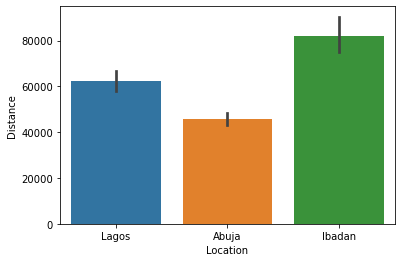

In [84]:
sns.barplot(y='Distance',x='Location', data=df_fu);

In [85]:
df_fu['Distance'].dtypes

dtype('float64')

In [86]:
df_fu_filled = df_fu.loc[df_fu['Distance'] != 0.0]

In [87]:
df_fu_filled['Distance'].mean()

88190.35097056982

In [88]:
df_fu_0 = df_fu.loc[df_fu['Distance'] == 0.0]

In [89]:
df_fu_0['Distance'] = df_fu.loc[df_fu['Distance'] == 0.0] = 88190.35

C:\Users\YASHIM~1\AppData\Local\Temp/ipykernel_23432/1016355919.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fu_0['Distance'] = df_fu.loc[df_fu['Distance'] == 0.0] = 88190.35
C:\Users\YASHIM GABRIEL\anaconda3\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [90]:
df_fu = pd.concat([df_fu_filled,df_fu_0])

### For Nigerian Used

In [91]:
df_nu = train.loc[train['Type'] == 'Nigerian Used']

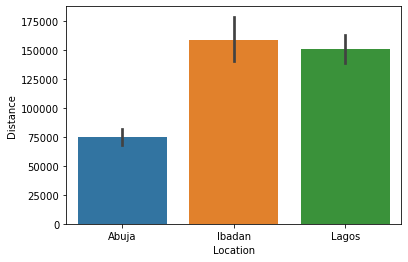

In [92]:
sns.barplot(y='Distance',x='Location', data=df_nu);

In [93]:
df_nu_filled = df_nu.loc[df_nu['Distance'] != 0.0]

In [94]:
df_nu_filled['Distance'].mean()

149082.7143874644

In [95]:
df_nu_0 = df_nu.loc[df_nu['Distance'] == 0.0]

In [96]:
df_nu_0['Distance'] = df_nu.loc[df_nu['Distance'] == 0.0] = 149082.71

C:\Users\YASHIM~1\AppData\Local\Temp/ipykernel_23432/219699264.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nu_0['Distance'] = df_nu.loc[df_nu['Distance'] == 0.0] = 149082.71
C:\Users\YASHIM GABRIEL\anaconda3\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [97]:
df_nu = pd.concat([df_nu_filled,df_nu_0])

### For Brand New

In [98]:
df_bn = train.loc[train['Type'] == 'Brand New']

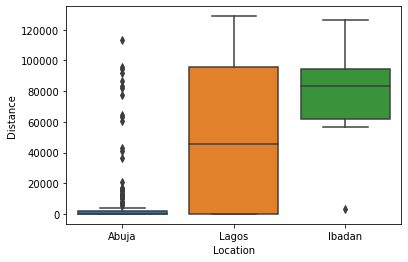

In [99]:
sns.boxplot(y='Distance',x='Location', data=df_bn);

In [100]:
df_bn_filled = df_bn.loc[df_bn['Distance'] != 0.0]

In [101]:
df_bn_filled['Distance'].mean()

34755.252100840335

In [102]:
df_bn_0 = df_bn.loc[df_bn['Distance'] == 0.0]

In [103]:
df_bn_0['Distance'] = df_bn.loc[df_bn['Distance'] == 0.0] = 34755.25

C:\Users\YASHIM~1\AppData\Local\Temp/ipykernel_23432/3572459363.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bn_0['Distance'] = df_bn.loc[df_bn['Distance'] == 0.0] = 34755.25
C:\Users\YASHIM GABRIEL\anaconda3\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [104]:
df_bn = pd.concat([df_bn_filled,df_bn_0])

### Joining the three dataframes (`df_fu`, `df_nu`, and `df_bn`) together.

In [105]:
train = pd.concat([df_fu,df_nu,df_bn])
# test = pd.concat([df_fu,df_nu,df_bn])

In [106]:
# train.shape
train.shape

(7188, 9)

In [107]:
train.tail()

,VehicleID,Location,Maker,Model,Year,Colour,Amount (Million Naira),Type,Distance
722,VHL13672,Abuja,Lexus,LX 570 (5 Seats) AWD Matt,2021,Black,85.00,Brand New,34755.25
1467,VHL11430,Lagos,BMW,X5,2003,Black,1.52,Brand New,34755.25
6581,VHL19199,Abuja,Nissan,Nissan Armada,2021,White,73.00,Brand New,34755.25
582,VHL12809,Abuja,Toyota,Hilux,2021,White,22.50,Brand New,34755.25
6786,VHL13786,Abuja,Brabus,Brabus Rocket 900,2021,Black,450.00,Brand New,34755.25


In [108]:
train = train.sample(frac=1, random_state=205)

In [109]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7188 entries, 2200 to 479
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   VehicleID               7188 non-null   object 
 1   Location                7188 non-null   object 
 2   Maker                   7188 non-null   object 
 3   Model                   7188 non-null   object 
 4   Year                    7188 non-null   object 
 5   Colour                  7188 non-null   object 
 6   Amount (Million Naira)  7188 non-null   float64
 7   Type                    7188 non-null   object 
 8   Distance                7188 non-null   float64
dtypes: float64(2), object(7)
memory usage: 561.6+ KB


In [110]:
train.isnull().sum()

VehicleID                 0
Location                  0
Maker                     0
Model                     0
Year                      0
Colour                    0
Amount (Million Naira)    0
Type                      0
Distance                  0
dtype: int64

In [111]:
# convert the year column into an integer column
train['Year'] = train['Year'].astype(int)
test['Year'] = test['Year'].astype(int)

In [112]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2061 entries, 44 to 377
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   VehicleID  2061 non-null   object 
 1   Location   2061 non-null   object 
 2   Maker      2061 non-null   object 
 3   Model      2061 non-null   object 
 4   Year       2061 non-null   int32  
 5   Colour     2061 non-null   object 
 6   Type       2061 non-null   object 
 7   Distance   2061 non-null   float64
dtypes: float64(1), int32(1), object(6)
memory usage: 136.9+ KB


In [114]:
train.to_csv('train_cleaned02.csv')

#### The end of the data cleaning phase